In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/patel/lighthouse-lab-allprojects/Final/Data/feature_clean.csv")

In [3]:
df.head()

,Unnamed: 0,address,name,rate,votes,location,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),liked_food_item,liked_food_from_review,Review_clean,positive_words
0,0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800.0,"['beautiful', 'place', 'dine', 'inthe', 'inter...",[],Buffet,Banashankari,[],"['butter roti', 'papad', 'kulcha', 'palak', 'p...",beautiful place dine inthe interior take back ...,52
1,1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,787,Banashankari,"Chinese, North Indian, Thai",800.0,"['dinner', 'family', 'turned', 'good', 'choose...",[],Buffet,Banashankari,[],"['chicken biryan', 'sweet', 'sweet and spicy',...",dinner family turned good choose suitable age ...,83
2,2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8,918,Banashankari,"Cafe, Mexican, Italian",800.0,"['ambience', 'good', 'enough', 'pocket', 'frie...",[],Buffet,Banashankari,[],"['pasta', 'chocolate', 'pizza', 'veggies', 'ho...",ambience good enough pocket friendly cafe quan...,71
3,3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7,88,Banashankari,"South Indian, North Indian",300.0,"['great', 'food', 'proper', 'karnataka', 'styl...",[],Buffet,Banashankari,[],"['ice cream', 'masala dosa', 'mango', 'apple',...",great food proper karnataka style full meal tw...,134
4,4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8,166,Basavanagudi,"North Indian, Rajasthani",600.0,"['good', 'restaurant', 'neighbourhood', 'buffe...",[],Buffet,Banashankari,[],"['kulcha', 'jamun', 'gulab jamun', 'paratha', ...",good restaurant neighbourhood buffet system pr...,5


In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12481 entries, 0 to 12480
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      12481 non-null  object 
 1   name                         12481 non-null  object 
 2   rate                         12481 non-null  float64
 3   votes                        12481 non-null  int64  
 4   location                     12481 non-null  object 
 5   cuisines                     12481 non-null  object 
 6   approx_cost(for two people)  12481 non-null  float64
 7   reviews_list                 12481 non-null  object 
 8   menu_item                    12481 non-null  object 
 9   listed_in(type)              12481 non-null  object 
 10  listed_in(city)              12481 non-null  object 
 11  liked_food_item              12481 non-null  object 
 12  liked_food_from_review       12481 non-null  object 
 13  Review_clean    

How many different restaurants are there in Bengaluru

C:\Users\patel\AppData\Local\Temp\ipykernel_31868\2645527317.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Purples')


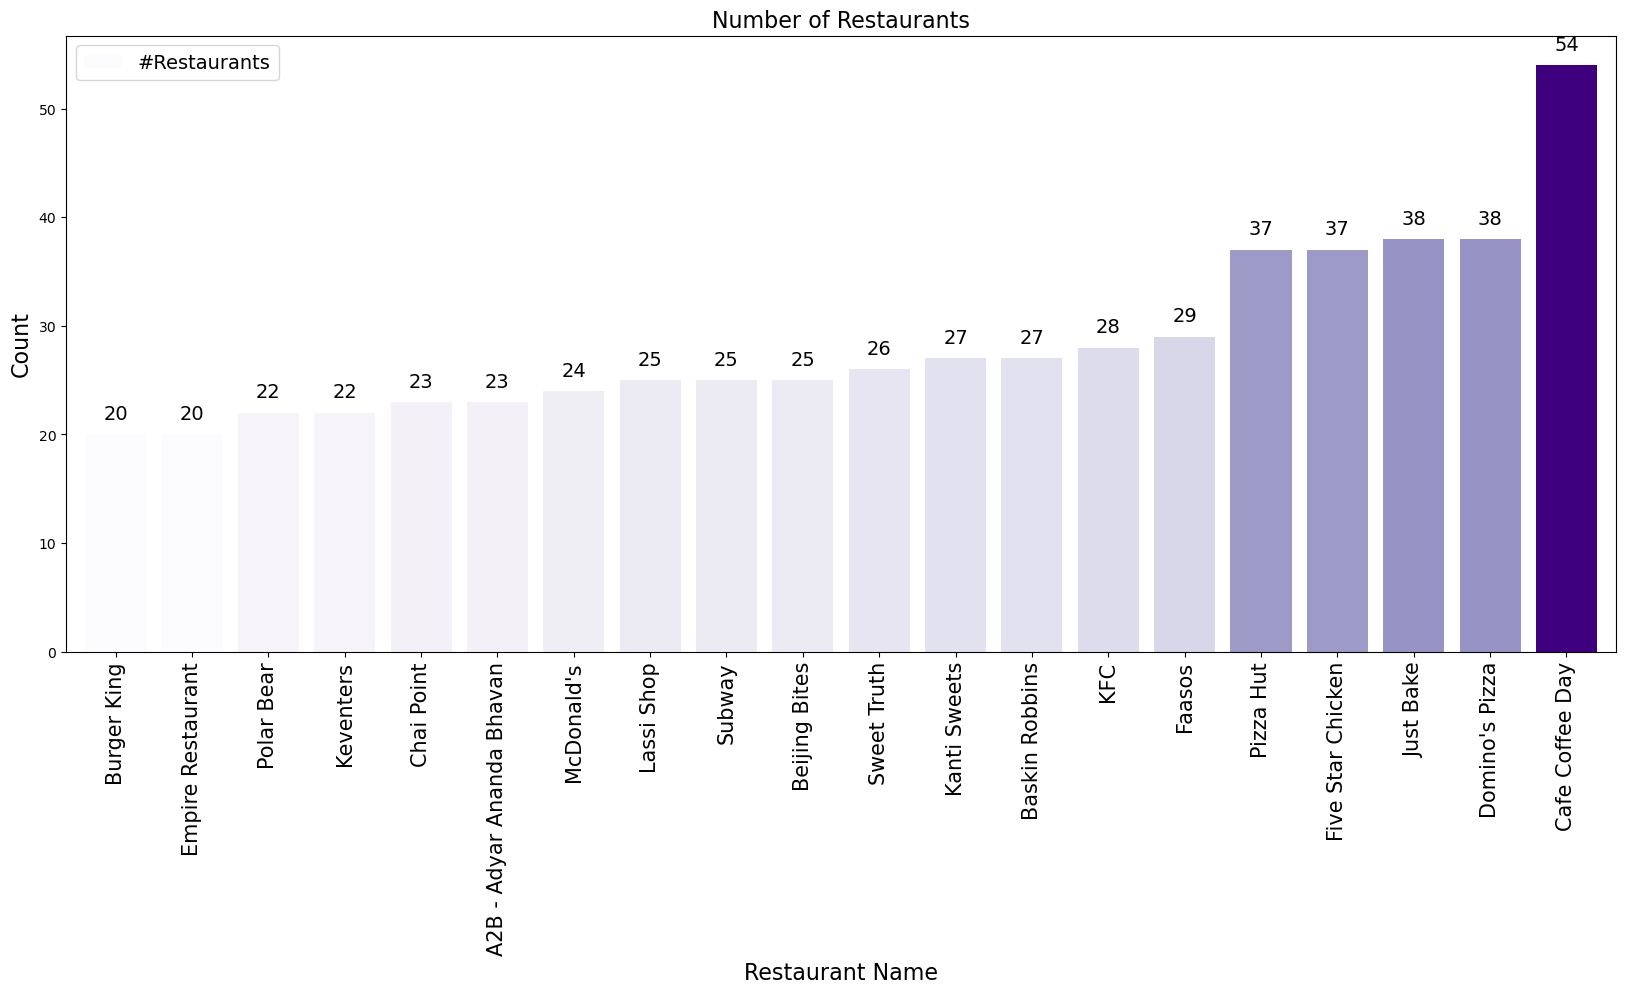

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Group the DataFrame by 'name' and count the occurrences of 'address'
histo = df.groupby('name')['address'].count()

# Select the top 20 restaurants based on the count
histo = histo.sort_values().tail(20)

# Create a colormap from darker to lighter shades of purple
cmap = cm.get_cmap('Purples')

# Normalize the data for color assignment
normalize = plt.Normalize(vmin=histo.min(), vmax=histo.max())

# Plot the bar graph
fig, ax = plt.subplots(figsize=(20, 8))
histo.plot(kind='bar', ax=ax, width=0.8, color=cmap(normalize(histo.values)), rot=90)

# Add labels to the bars
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)

# Customize the plot
ax.tick_params(axis='x', labelsize=15)
ax.set_title('Number of Restaurants', fontsize=16)
ax.set_xlabel('Restaurant Name', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_facecolor("white")
ax.legend(['#Restaurants'], fontsize=14)

plt.grid(False)  # Remove gridlines
plt.show()


What are top 50 popular Reastaurents in  Bengaluru


C:\Users\patel\AppData\Local\Temp\ipykernel_6360\2546131821.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Purples')


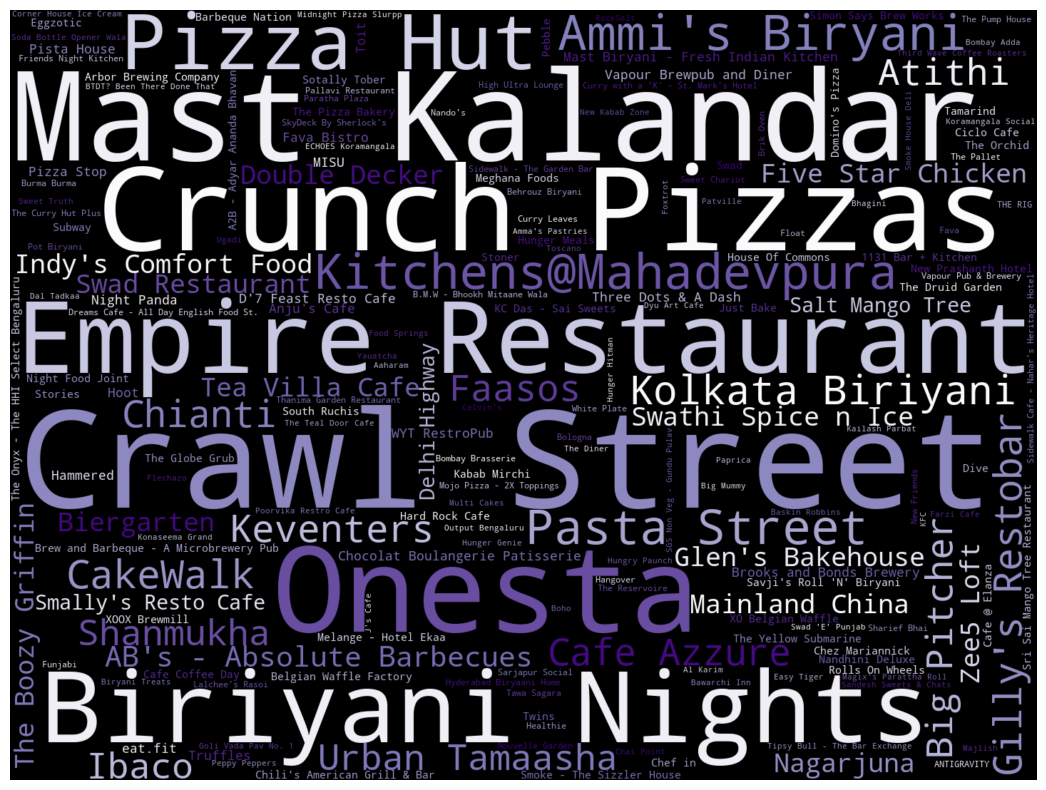

In [3]:
from subprocess import check_output
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Group the DataFrame by 'name' and sum the positive words
positive_words_sum = df.groupby('name')['positive_words'].sum()

# Generate WordCloud from the frequencies of positive words sum
cmap = cm.get_cmap('Purples')
wordcloud = WordCloud(width=1440, height=1080, relative_scaling=0.5, colormap=cmap).generate_from_frequencies(positive_words_sum)

# Plot the WordCloud
fig = plt.figure(1, figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

What are top 50 Rated Reastaurents in  Bengaluru


In [30]:
df.groupby(['name'])['rate'].mean().sort_values()[-50:][:-1]

name
1131 Bar + Kitchen                                                                  4.600000
Here & Now                                                                          4.600000
Smoke House Deli                                                                    4.600000
The Globe Grub                                                                      4.600000
The Hole in the Wall Cafe                                                           4.600000
Rim Naam - The Oberoi                                                               4.600000
Truffles                                                                            4.600000
Dock Frost'd                                                                        4.600000
Mugful Of Stories                                                                   4.600000
The Fatty Bao - Asian Gastro Bar                                                    4.600000
Kurtoskalacs                                                     

C:\Users\patel\AppData\Local\Temp\ipykernel_31868\426206525.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Purples')
c:\Users\patel\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\patel\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


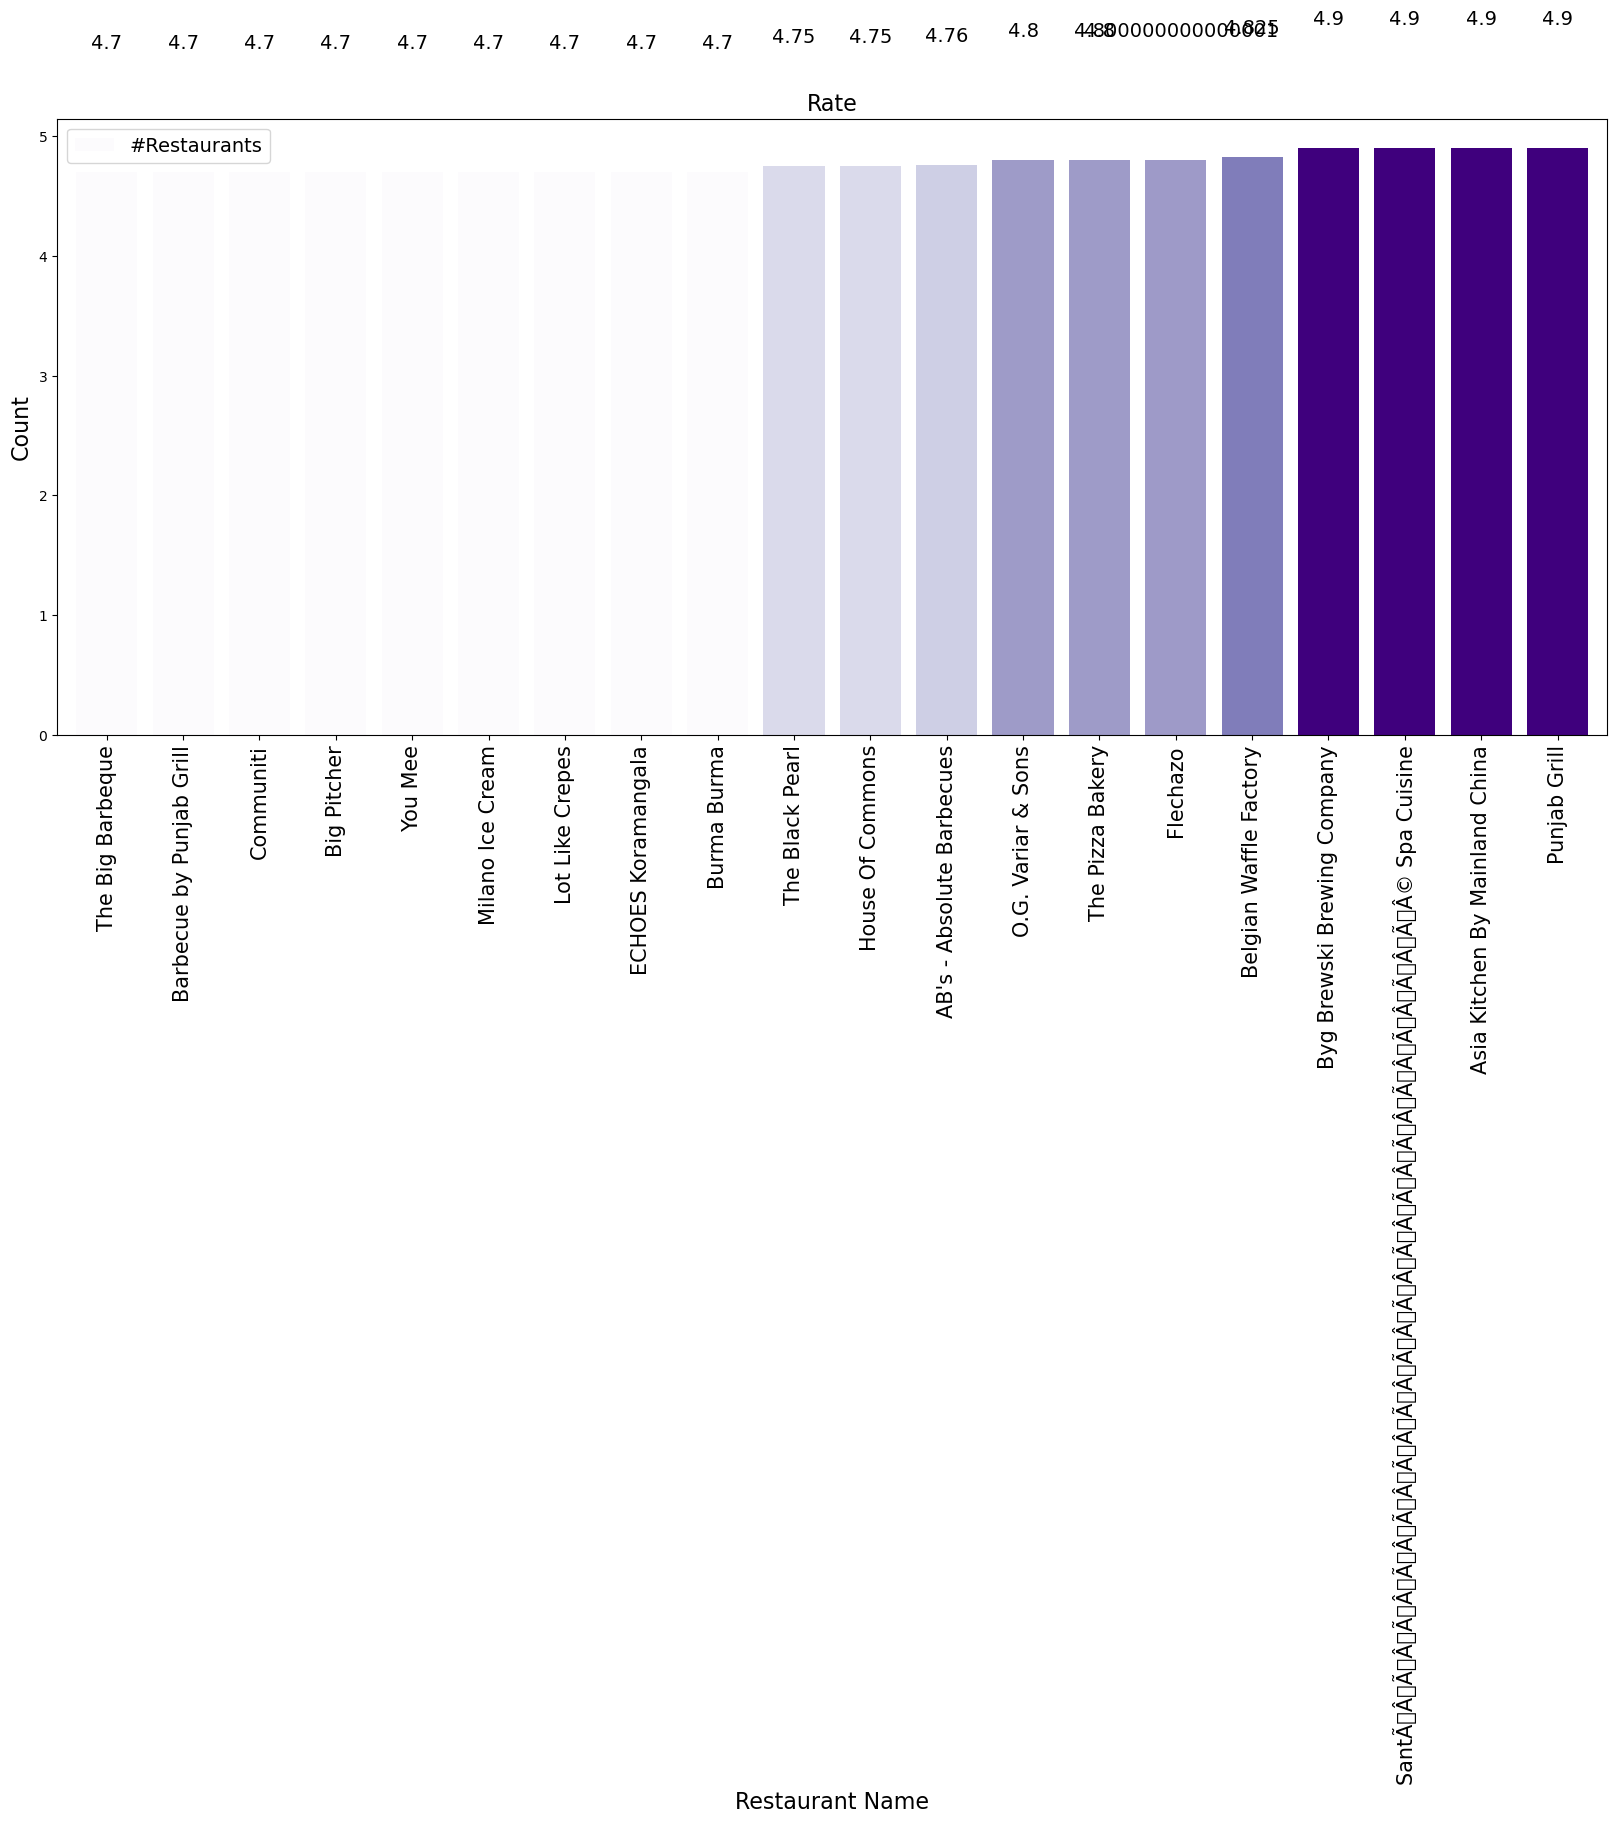

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Group the DataFrame by 'name' and count the occurrences of 'address'
histo = df.groupby(['name'])['rate'].mean()

# Select the top 20 restaurants based on the count
histo = histo.sort_values().tail(20)

# Create a colormap from darker to lighter shades of purple
cmap = cm.get_cmap('Purples')

# Normalize the data for color assignment
normalize = plt.Normalize(vmin=histo.min(), vmax=histo.max())

# Plot the bar graph
fig, ax = plt.subplots(figsize=(20, 8))
histo.plot(kind='bar', ax=ax, width=0.8, color=cmap(normalize(histo.values)), rot=90)

# Add labels to the bars
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)

# Customize the plot
ax.tick_params(axis='x', labelsize=15)
ax.set_title('Rate', fontsize=16)
ax.set_xlabel('Restaurant Name', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_facecolor("white")
ax.legend(['#Restaurants'], fontsize=14)

plt.grid(False)  # Remove gridlines
plt.show()

Number of restaurants in each Neighborhood

C:\Users\patel\AppData\Local\Temp\ipykernel_18184\2285053750.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Purples')


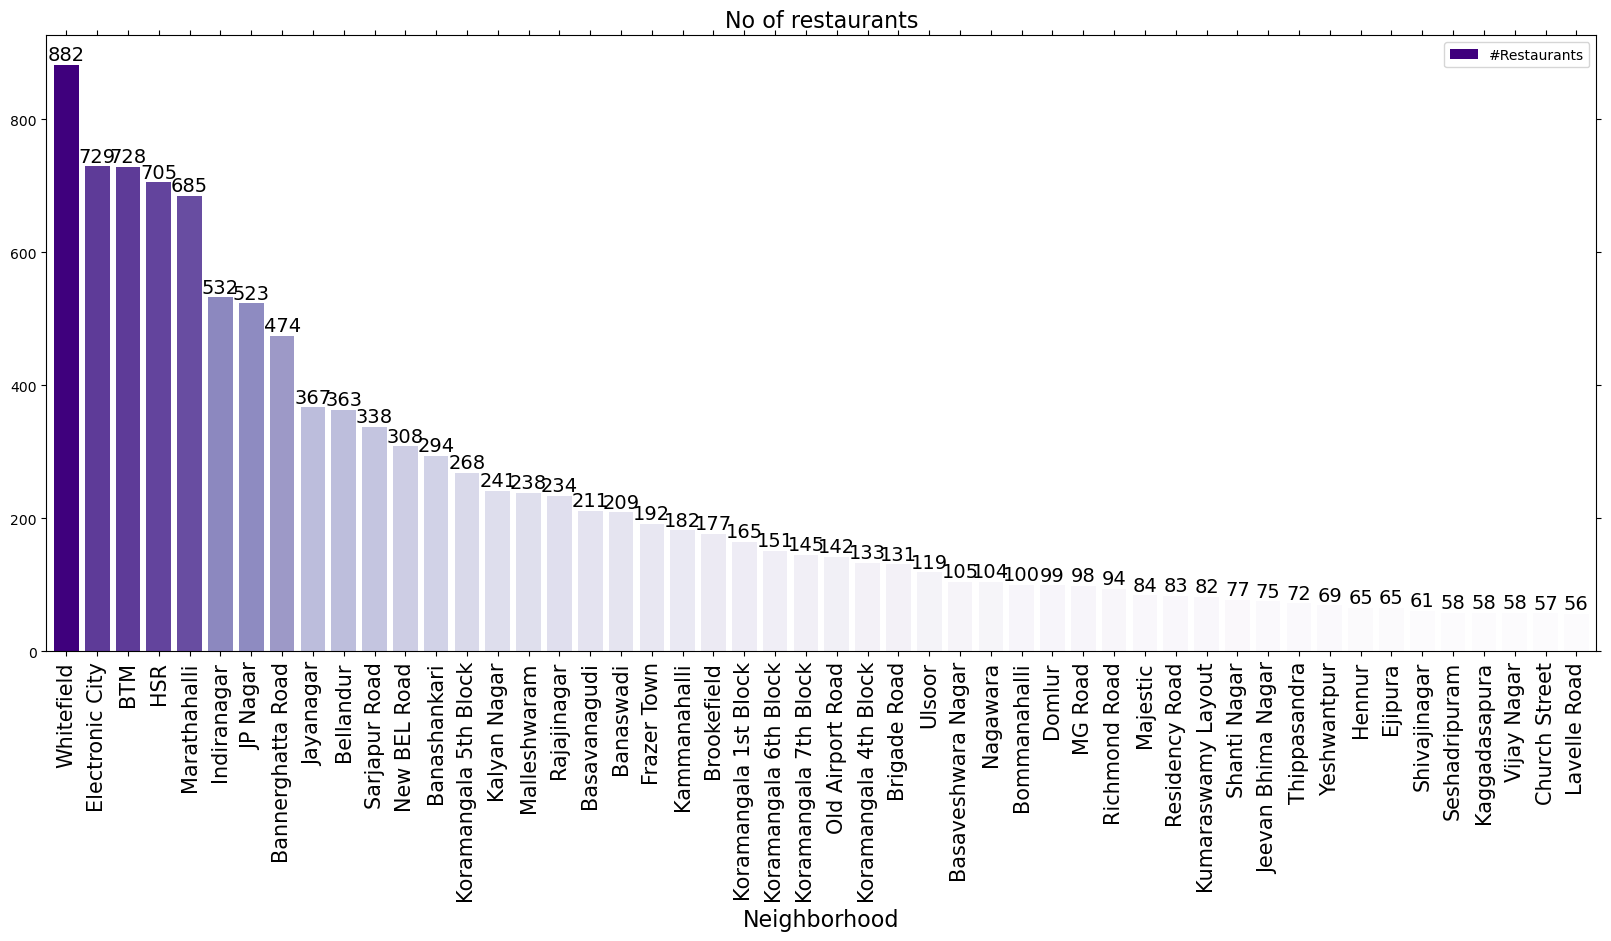

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

histo = df.groupby('location')['address'].count().sort_values(ascending=False)[:50]


# Create a colormap from darker to lighter shades of purple
cmap = cm.get_cmap('Purples')

# Normalize the data for color assignment
normalize = plt.Normalize(vmin=histo.min(), vmax=histo.max())

# Plot the bar graph
fig, ax = plt.subplots(figsize=(20, 8))
histo.plot(kind='bar', ax=ax, width=0.8, color=cmap(normalize(histo.values)), rot=90)

# Add labels to the bars
rects = ax.patches
labels = list(histo)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom', fontsize=14)

# Customize the plot
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on') # remove borders
ax.xaxis.set_tick_params(labelsize=15) # set xticks as 14
ax.legend(fontsize=14) # set legend sie as 14
ax.set_title('No of restaurants', fontsize=16) # set title and add font size as 16
ax.set_xlabel('Neighborhood', fontsize=16)
#ax.grid(False)  # remove grid
ax.set_facecolor("white") # set bg color white
ax.legend(['#Restaurants'])

plt.grid(False)  # Remove gridlines
plt.show()

Zomato's Presence across Bangalore

In [41]:
import plotly.graph_objects as go
from plotly.offline import iplot

# Get the labels and values for the pie chart
labels = list(df.location.value_counts().index)
values = list(df.location.value_counts().values)

# Create the pie chart data
data = [
    {
        "labels": labels,
        "values": values,
        "hoverinfo": 'label+percent',
        "domain": {"x": [0, .9]},
        "hole": 0.6,
        "type": "pie",
        "rotation": 120,
    }
]

# Create the layout for the pie chart
layout = {
    "title": "Zomato's Presence in Bangalore",
    "annotations": [
        {
            "font": {"size": 20},
            "showarrow": True,
            "text": "Neighborhood",
            "x": 0.2,
            "y": 0.9,
        },
    ],
    "width": 1000,  # Adjust the width of the pie chart
    "height": 1000,  # Adjust the height of the pie chart
}

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Display the pie chart
iplot(fig)

Lets get the coordinates for each of the neighborhood

In [46]:
df.columns

Index(['address', 'name', 'rate', 'votes', 'location', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'liked_food_item',
       'liked_food_from_review', 'Review_clean', 'positive_words'],
      dtype='object')

In [48]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ny_explorer")

def get_coordinates(address):
    try:
        location = geolocator.geocode(address)
        if location is not None:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Add latitude and longitude columns to the DataFrame
df['latitude'], df['longitude'] = zip(*df['location'].apply(lambda x: get_coordinates(f'{x}, Bengaluru, India')))

In [49]:
#df.to_csv('Final.csv', index=False)

In [2]:
df = pd.read_csv('Final.csv')

In [3]:
df.head()

,address,name,rate,votes,location,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),liked_food_item,liked_food_from_review,Review_clean,positive_words,latitude,longitude
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800.0,"['beautiful', 'place', 'dine', 'inthe', 'inter...",[],Buffet,Banashankari,[],"['butter roti', 'papad', 'kulcha', 'palak', 'p...",beautiful place dine inthe interior take back ...,52,12.915221,77.573598
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,787,Banashankari,"Chinese, North Indian, Thai",800.0,"['dinner', 'family', 'turned', 'good', 'choose...",[],Buffet,Banashankari,[],"['chicken biryan', 'sweet', 'sweet and spicy',...",dinner family turned good choose suitable age ...,83,12.915221,77.573598
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8,918,Banashankari,"Cafe, Mexican, Italian",800.0,"['ambience', 'good', 'enough', 'pocket', 'frie...",[],Buffet,Banashankari,[],"['pasta', 'chocolate', 'pizza', 'veggies', 'ho...",ambience good enough pocket friendly cafe quan...,71,12.915221,77.573598
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7,88,Banashankari,"South Indian, North Indian",300.0,"['great', 'food', 'proper', 'karnataka', 'styl...",[],Buffet,Banashankari,[],"['ice cream', 'masala dosa', 'mango', 'apple',...",great food proper karnataka style full meal tw...,134,12.915221,77.573598
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8,166,Basavanagudi,"North Indian, Rajasthani",600.0,"['good', 'restaurant', 'neighbourhood', 'buffe...",[],Buffet,Banashankari,[],"['kulcha', 'jamun', 'gulab jamun', 'paratha', ...",good restaurant neighbourhood buffet system pr...,5,12.941726,77.575502


In [8]:
import folium

# Filter out rows with NaN values for latitude and longitude
filtered_df = dataframe_filtered.dropna(subset=['latitude', 'longitude'])

# Create the map centered around Bengaluru
venues_map = folium.Map(location=[12.934533, 77.626579], zoom_start=11)

# Add circle markers for each location
for lat, lng in zip(filtered_df['latitude'], filtered_df['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Add markers with popups for each location
for location, lat, lng in zip(filtered_df.index, filtered_df['latitude'], filtered_df['longitude']):
    folium.Marker(
        [lat, lng],
        popup=location
    ).add_to(venues_map)

# Display the map
venues_map



Let's check coreelation between features

In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/patel/lighthouse-lab-allprojects/Final/Data/ranked_restaurants.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12481 entries, 0 to 12480
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      12481 non-null  object 
 1   name                         12481 non-null  object 
 2   rate                         12481 non-null  float64
 3   votes                        12481 non-null  int64  
 4   location                     12481 non-null  object 
 5   cuisines                     12481 non-null  object 
 6   approx_cost(for two people)  12481 non-null  float64
 7   reviews_list                 12481 non-null  object 
 8   menu_item                    12481 non-null  object 
 9   listed_in(type)              12481 non-null  object 
 10  listed_in(city)              12481 non-null  object 
 11  liked_food_item              12481 non-null  object 
 12  liked_food_from_review       12481 non-null  object 
 13  Review_clean    

In [5]:
df.columns

Index(['address', 'name', 'rate', 'votes', 'location', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'liked_food_item',
       'liked_food_from_review', 'Review_clean', 'positive_words', 'latitude',
       'longitude', 'rank'],
      dtype='object')

In [6]:
columns = ['address', 'name', 'reviews_list', 'menu_item',
       'listed_in(city)', 'liked_food_item',
       'liked_food_from_review', 'Review_clean', 'latitude',
       'longitude']

In [11]:
temp = df.drop(columns = columns)

In [14]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12481 entries, 0 to 12480
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rate                         12481 non-null  float64
 1   votes                        12481 non-null  int64  
 2   location                     12481 non-null  object 
 3   cuisines                     12481 non-null  object 
 4   approx_cost(for two people)  12481 non-null  float64
 5   listed_in(type)              12481 non-null  object 
 6   positive_words               12481 non-null  int64  
 7   rank                         12481 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 780.2+ KB


In [15]:
df.location.nunique()

93

C:\Users\patel\AppData\Local\Temp\ipykernel_6360\394186268.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = temp.corr()


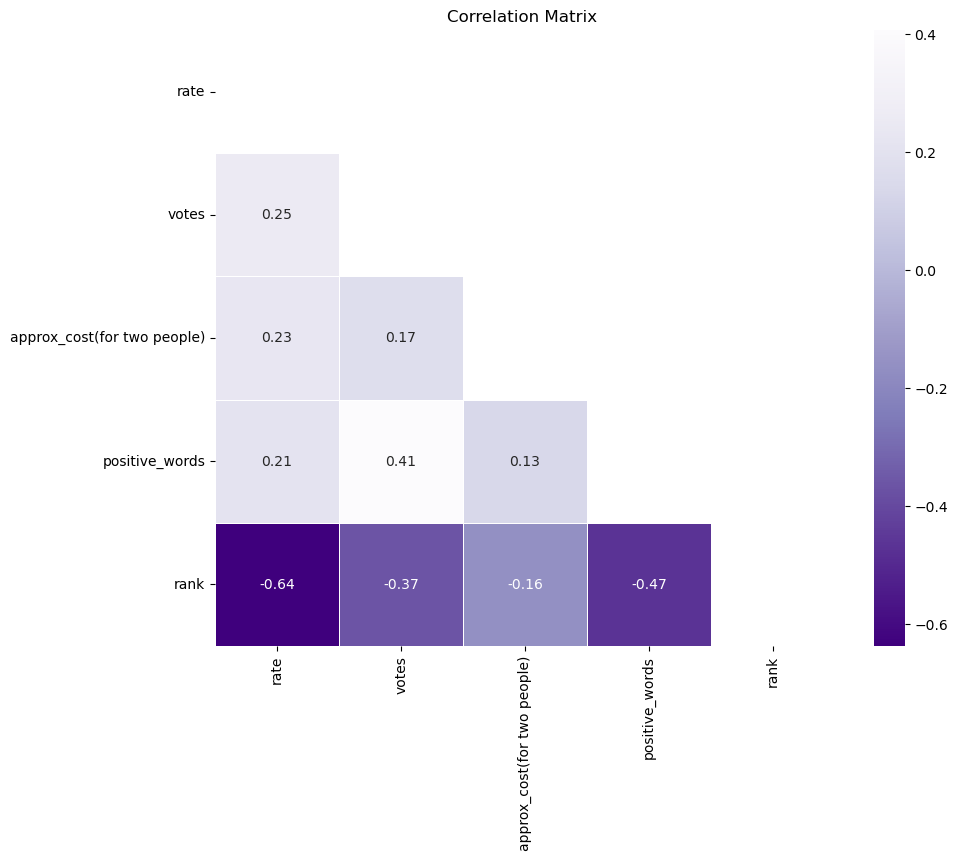

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix = temp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap and reverse it
cmap = sns.color_palette("Purples", as_cmap=True)
cmap = cmap.reversed()

# Draw the correlation matrix heatmap with reversed colormap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

# Add a title
plt.title('Correlation Matrix ')

# Show the plot
plt.show()


Average ratings location wise

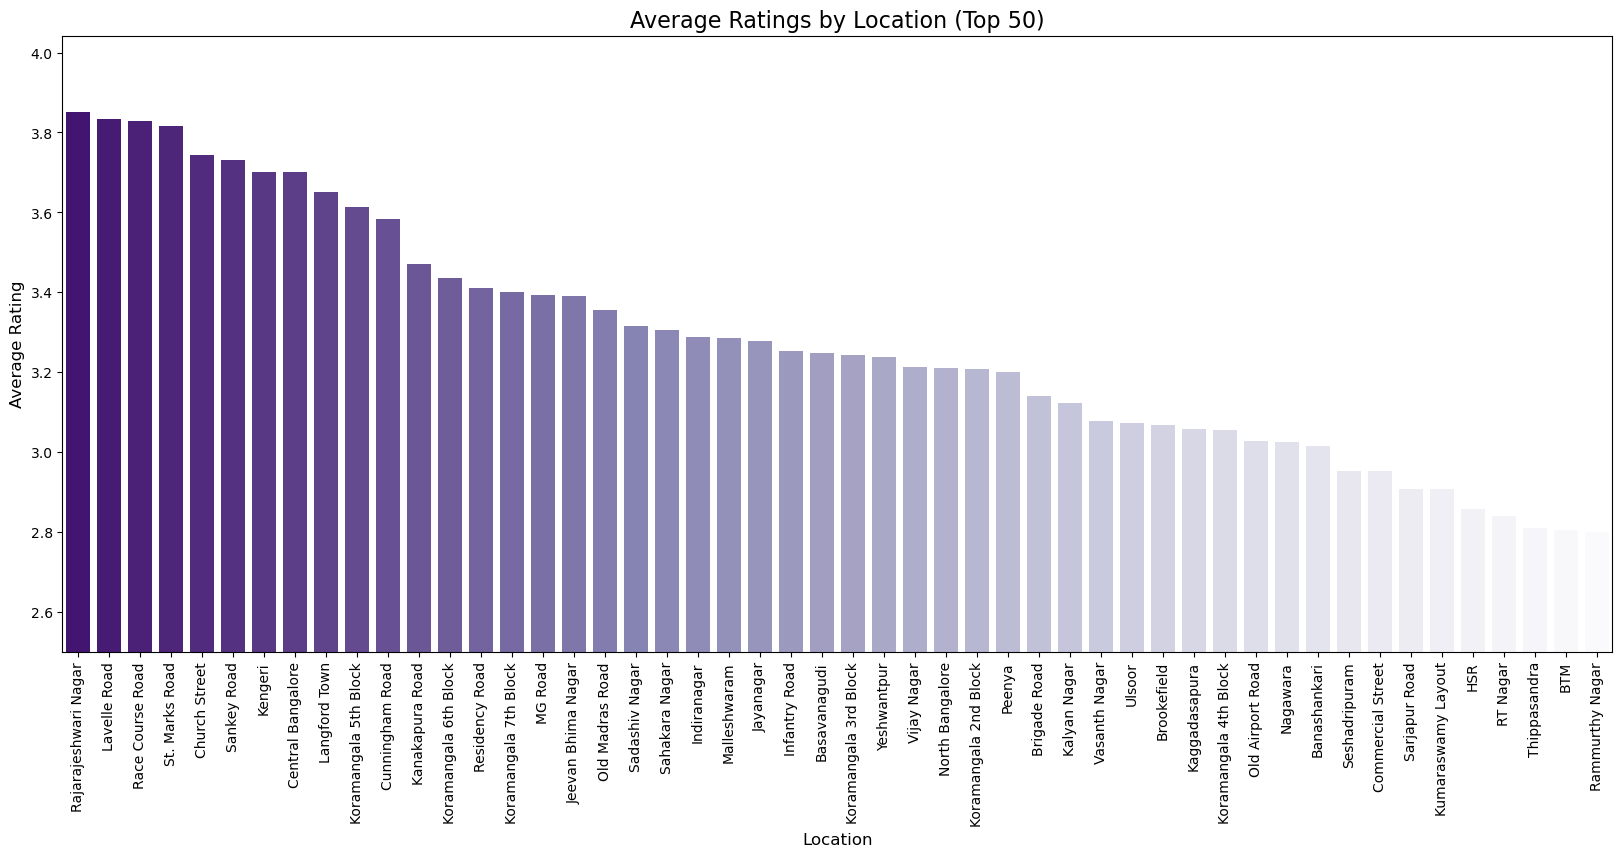

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate average ratings by location
average_ratings = df.groupby('location')['rate'].mean().reset_index()

# Sort locations by average rating in descending order
average_ratings = average_ratings.sort_values('rate', ascending=False)

# Select top 20 locations
top_50_ratings = average_ratings.head(50)

# Define color palette from lighter to darker shades of purple
colors = sns.color_palette("Purples_r", len(top_50_ratings))

# Plotting the bar graph
plt.figure(figsize=(20, 8))
sns.barplot(x='location', y='rate', data=top_50_ratings, palette=colors)

# Set the title and labels for the graph
plt.title('Average Ratings by Location (Top 50)', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Set the minimum y-axis value to 2.5
plt.ylim(2.5, None)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()
